# Import data and libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from scipy.stats import dirichlet

segmentation_names = ['Class','REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT',
               'SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD',
               'HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN',
               'RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN']

segmentation = pd.read_table('image segmentation/segmentation.data', sep = ",", names=segmentation_names)
segmentation.reindex(index=segmentation_names)
print(segmentation.head())

       Class  REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0  BRICKFACE                140.0                125.0                   9   
1  BRICKFACE                188.0                133.0                   9   
2  BRICKFACE                105.0                139.0                   9   
3  BRICKFACE                 34.0                137.0                   9   
4  BRICKFACE                 39.0                111.0                   9   

   SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
0                   0.0                   0.0    0.277778  0.062963   
1                   0.0                   0.0    0.333333  0.266667   
2                   0.0                   0.0    0.277778  0.107407   
3                   0.0                   0.0    0.500000  0.166667   
4                   0.0                   0.0    0.722222  0.374074   

   HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
0    0.666667  0.311111        6.1

In [91]:
segmentation[segmentation_names]

,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,GRASS,36.0,243.0,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,GRASS,186.0,218.0,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,GRASS,197.0,236.0,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,GRASS,208.0,240.0,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


# 檢查是否有Categorical資料與缺失值

In [92]:
# find categorical variables

categorical = [var for var in segmentation.columns if segmentation[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

# view the categorical variables if they exist

segmentation[categorical].head()

There are 1 categorical variables

The categorical variables are :

 ['Class']


,Class
0,BRICKFACE
1,BRICKFACE
2,BRICKFACE
3,BRICKFACE
4,BRICKFACE


In [93]:
# 檢查categorical attribute中是否有missing values

segmentation[categorical].isnull().sum()

Class    0
dtype: int64

In [94]:
# 計算各個 class 的個數
freq = segmentation['Class'].value_counts()
print(freq)

PATH         30
CEMENT       30
WINDOW       30
GRASS        30
BRICKFACE    30
FOLIAGE      30
SKY          30
Name: Class, dtype: int64


# Data Preprocessing

## Ten-bin discretization

In [95]:
X = segmentation[['REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT',
               'SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD',
               'HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN',
               'RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN']]
y = segmentation['Class']

# 對 id 和 class 以外的特徵做 ten-bin
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_t = est.fit_transform(X)

c:\users\nbswo\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_discretization.py:187: UserWarning: Feature 2 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "


In [96]:
print(X_t[0])

[5. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 9. 1. 4. 0. 5. 2.]


In [97]:
print(np.shape(X_t))

(210, 19)


#  Model 1 : Naive Bayesian classifier have Dirichlet priors with the Laplace’s estimate

In [98]:
import scipy.stats
# alpha 是各個 class 的數量
d = scipy.stats.dirichlet.rvs(alpha = [30, 30, 30, 30, 30, 30, 30], size=1, random_state=1)
print(d)

# alpha=1 代表 Laplace’s estimate 的分子是 n_ij + 1
clf = MultinomialNB(alpha=1, fit_prior = True, class_prior=d.flatten())
clf.fit(X_t, y)

[[0.17817651 0.11957994 0.12149652 0.10936586 0.18178505 0.11620349
  0.17339263]]


MultinomialNB(alpha=1,
              class_prior=array([0.17817651, 0.11957994, 0.12149652, 0.10936586, 0.18178505,
       0.11620349, 0.17339263]))

## 5-Fold cross validation

In [99]:
score = cross_val_score(clf, X_t, y, scoring='accuracy', cv=5)
print('Means of 5-Fold cross validation:', round(score.mean(),3))

Means of 5-Fold cross validation: 0.705


## Ranking Attribute by selective naïve Bayes

In [100]:
result = permutation_importance(clf, X_t, y,scoring='accuracy', random_state=0)

print(result.importances_mean)

[0.05904762 0.09333333 0.         0.01904762 0.01238095 0.01714286
 0.00571429 0.01333333 0.00285714 0.00952381 0.01904762 0.00761905
 0.00761905 0.02095238 0.05904762 0.02380952 0.00666667 0.01714286
 0.15619048]


In [101]:
importances = result.importances_mean

# 把 Attribute 的重要性由大到排序輸出
indices = np.argsort(importances)[::-1]

for i in range(X.shape[1]):
    print('%-10s'%result.importances_mean[indices[i]])

0.15619047619047624
0.09333333333333335
0.059047619047619085
0.05904761904761906
0.023809523809523857
0.020952380952380965
0.019047619047619112
0.01904761904761909
0.01714285714285717
0.01714285714285717
0.013333333333333374
0.012380952380952404
0.009523809523809556
0.007619047619047636
0.007619047619047614
0.006666666666666687
0.005714285714285739
0.002857142857142847
0.0       


<function matplotlib.pyplot.show(close=None, block=None)>

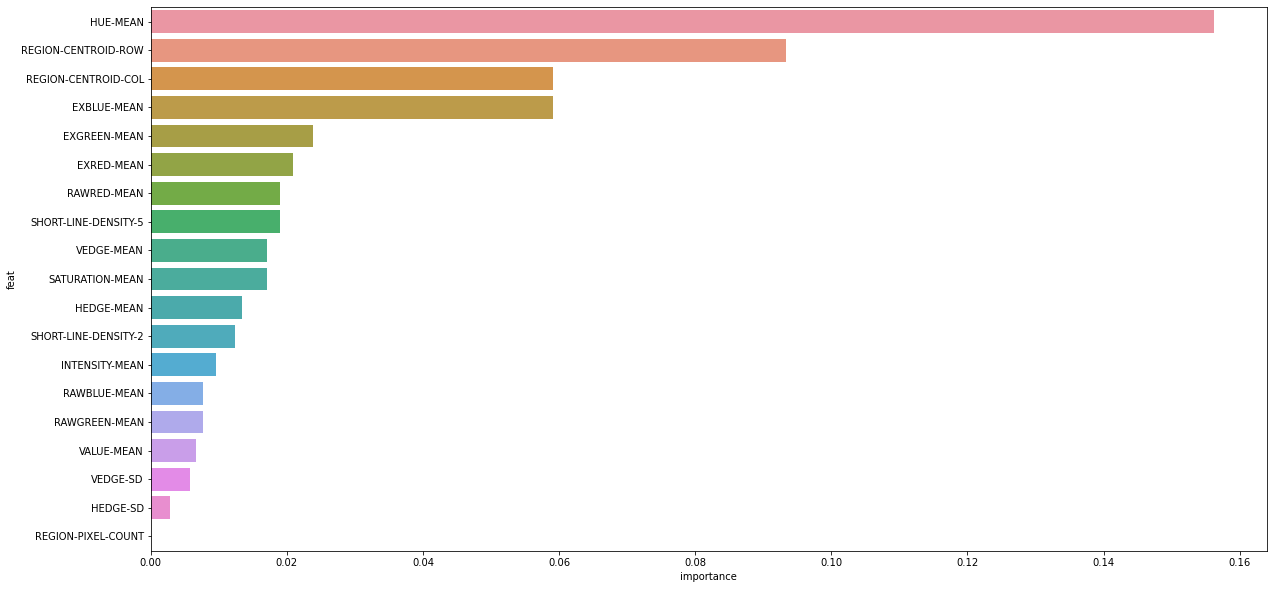

In [102]:
# 視覺化
import seaborn as sns
featImp = pd.DataFrame()
featImp['feat'] = ['REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT',
               'SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD',
               'HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN',
               'RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN']
featImp['importance'] = result.importances_mean
featImp = featImp.sort_values('importance',ascending = False)
plt.figure(figsize=[20,10])
sns.barplot(x = 'importance', y = 'feat',data = featImp[:20], orient='h')
plt.show

## 重新排序特徵

In [103]:
X = segmentation[['REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT',
               'SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD',
               'HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN',
               'RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN']]
y = segmentation['Class']

print(X.head())

# Ten-bin
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_t = est.fit_transform(X)

# alpha 是各個 class 的數量
d = scipy.stats.dirichlet.rvs(alpha = [30, 30, 30, 30, 30, 30, 30], size=1, random_state=1)
print(d)

# alpha=1 代表 Laplace’s estimate 的分子是 n_ij + 1
clf = MultinomialNB(alpha=1, fit_prior = True, class_prior=d.flatten())
clf.fit(X_t, y)

score = cross_val_score(clf, X_t, y, scoring='accuracy', cv=5)
print('Means of 5-Fold cross validation:', round(score.mean(),3))

   REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0                140.0                125.0                   9   
1                188.0                133.0                   9   
2                105.0                139.0                   9   
3                 34.0                137.0                   9   
4                 39.0                111.0                   9   

   SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
0                   0.0                   0.0    0.277778  0.062963   
1                   0.0                   0.0    0.333333  0.266667   
2                   0.0                   0.0    0.277778  0.107407   
3                   0.0                   0.0    0.500000  0.166667   
4                   0.0                   0.0    0.722222  0.374074   

   HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
0    0.666667  0.311111        6.185185     7.333334      7.666666   
1    0.500000  0.077778       

c:\users\nbswo\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_discretization.py:187: UserWarning: Feature 2 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "


[[0.17817651 0.11957994 0.12149652 0.10936586 0.18178505 0.11620349
  0.17339263]]
Means of 5-Fold cross validation: 0.705


#  Model 2 : Naive Bayesian classifier have  the best noninformative Dirichlet priors

In [104]:
X = segmentation[['REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT',
               'SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD',
               'HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN',
               'RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN']]
y = segmentation['Class']

# 對 id 和 class 以外的特徵做 ten-bin
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_t = est.fit_transform(X)

c:\users\nbswo\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_discretization.py:187: UserWarning: Feature 2 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "


In [105]:
import scipy.stats
d = scipy.stats.dirichlet.rvs(alpha = [1,1,1,1,1,1,1], size=1, random_state=1)
print(d)

[[2.04739995e-01 4.83435093e-01 4.33991577e-05 1.36597873e-01
  6.02184030e-02 3.67601721e-02 7.82050643e-02]]


In [106]:
clf = MultinomialNB(alpha=1, fit_prior = True, class_prior=d.flatten())
clf.fit(X_t, y)

MultinomialNB(alpha=1,
              class_prior=array([2.04739995e-01, 4.83435093e-01, 4.33991577e-05, 1.36597873e-01,
       6.02184030e-02, 3.67601721e-02, 7.82050643e-02]))

In [107]:
score = cross_val_score(clf, X_t, y, scoring='accuracy', cv=5)
print('Means of 5-Fold cross validation:', round(score.mean(),3))

Means of 5-Fold cross validation: 0.595


In [108]:
result = permutation_importance(clf, X_t, y,scoring='accuracy', random_state=0)

print(result.importances_mean)

[ 0.04       -0.00761905  0.          0.00285714  0.01619048  0.01047619
  0.00571429  0.01047619  0.00095238  0.00952381  0.01333333  0.01142857
  0.02190476  0.02666667  0.05142857 -0.00095238  0.01428571 -0.0152381
  0.14095238]


In [109]:
importances = result.importances_mean

# 把 Attribute 的重要性由大到排序輸出
indices = np.argsort(importances)[::-1]

for i in range(X.shape[1]):
    print('%-10s'%result.importances_mean[indices[i]])

0.140952380952381
0.05142857142857145
0.040000000000000015
0.026666666666666707
0.021904761904761937
0.0161904761904762
0.014285714285714323
0.01333333333333333
0.011428571428571455
0.010476190476190528
0.010476190476190505
0.009523809523809535
0.005714285714285739
0.0028571428571428693
0.000952380952380949
0.0       
-0.0009523809523809268
-0.007619047619047592
-0.015238095238095184


<function matplotlib.pyplot.show(close=None, block=None)>

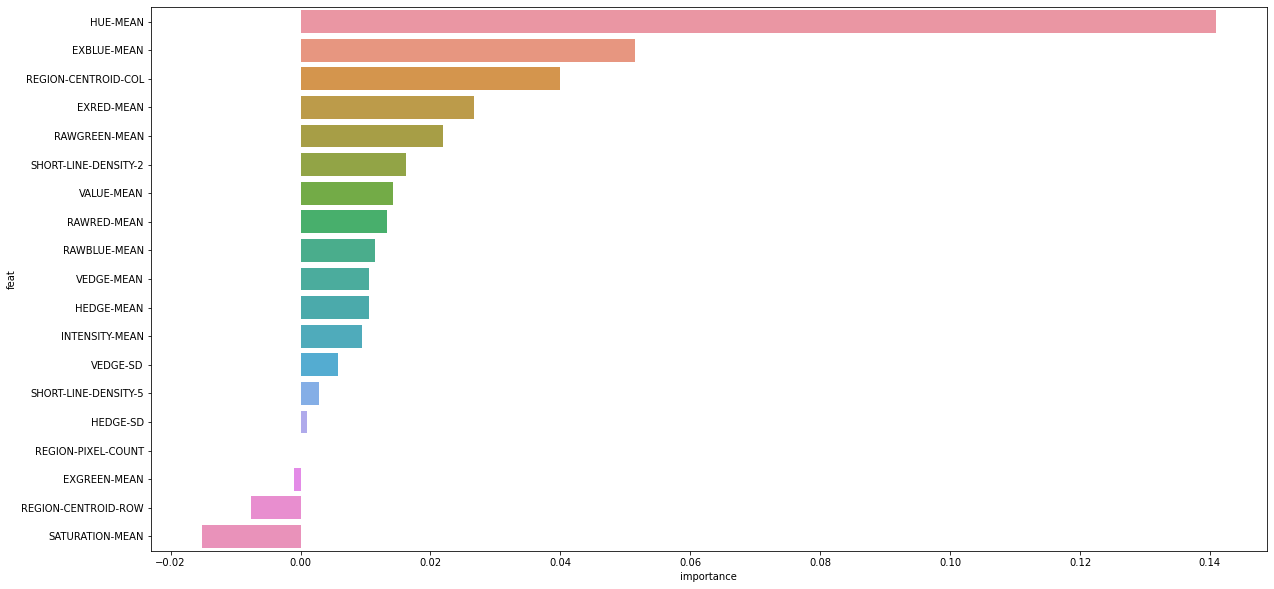

In [110]:
# 視覺化
import seaborn as sns
featImp = pd.DataFrame()
featImp['feat'] = ['REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT',
               'SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD',
               'HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN',
               'RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN']
featImp['importance'] = result.importances_mean
featImp = featImp.sort_values('importance',ascending = False)
plt.figure(figsize=[20,10])
sns.barplot(x = 'importance', y = 'feat',data = featImp[:20], orient='h')
plt.show

In [111]:
X = segmentation[['REGION-CENTROID-COL','REGION-PIXEL-COUNT',
               'SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD',
               'HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN',
               'RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','VALUE-MEAN','HUE-MEAN']]
y = segmentation['Class']

# print(X.head())

# Ten-bin
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_t = est.fit_transform(X)

import scipy.stats
d = scipy.stats.dirichlet.rvs(alpha = [1,1,1,1,1,1,1], size=1, random_state=1)
# print(d)

clf = MultinomialNB(alpha=1, fit_prior = True, class_prior=d.flatten())
clf.fit(X_t, y)

score = cross_val_score(clf, X_t, y, scoring='accuracy', cv=5)
print('Means of 5-Fold cross validation:', round(score.mean(),3))

c:\users\nbswo\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_discretization.py:187: UserWarning: Feature 1 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "


Means of 5-Fold cross validation: 0.59


## 額外實驗：分別刪掉三個特徵的表現

### 只刪掉SATURATION-MEAN

In [112]:
X = segmentation[['REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT',
               'SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD',
               'HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN',
               'RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN','VALUE-MEAN','HUE-MEAN']]
y = segmentation['Class']

# print(X.head())

# Ten-bin
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_t = est.fit_transform(X)

import scipy.stats
d = scipy.stats.dirichlet.rvs(alpha = [1,1,1,1,1,1,1], size=1, random_state=1)
# print(d)

clf = MultinomialNB(alpha=1, fit_prior = True, class_prior=d.flatten())
clf.fit(X_t, y)

score = cross_val_score(clf, X_t, y, scoring='accuracy', cv=5)
print('Means of 5-Fold cross validation:', round(score.mean(),3))

c:\users\nbswo\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_discretization.py:187: UserWarning: Feature 2 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "


Means of 5-Fold cross validation: 0.605


### 只刪掉REGION-CENTROID-ROW

In [113]:
X = segmentation[['REGION-CENTROID-COL','REGION-PIXEL-COUNT',
               'SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD',
               'HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN',
               'RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN']]
y = segmentation['Class']

# print(X.head())

# Ten-bin
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_t = est.fit_transform(X)

import scipy.stats
d = scipy.stats.dirichlet.rvs(alpha = [1,1,1,1,1,1,1], size=1, random_state=1)
# print(d)

clf = MultinomialNB(alpha=1, fit_prior = True, class_prior=d.flatten())
clf.fit(X_t, y)

score = cross_val_score(clf, X_t, y, scoring='accuracy', cv=5)
print('Means of 5-Fold cross validation:', round(score.mean(),3))

c:\users\nbswo\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_discretization.py:187: UserWarning: Feature 1 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "


Means of 5-Fold cross validation: 0.59


### 只刪掉EXGREEN-MEAN

In [114]:


X = segmentation[['REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT',
               'SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN','VEDGE-SD',
               'HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN',
               'RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN']]
y = segmentation['Class']

# print(X.head())

# Ten-bin
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_t = est.fit_transform(X)

import scipy.stats
d = scipy.stats.dirichlet.rvs(alpha = [1,1,1,1,1,1,1], size=1, random_state=1)
# print(d)

clf = MultinomialNB(alpha=1, fit_prior = True, class_prior=d.flatten())
clf.fit(X_t, y)

score = cross_val_score(clf, X_t, y, scoring='accuracy', cv=5)
print('Means of 5-Fold cross validation:', round(score.mean(),3))

c:\users\nbswo\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_discretization.py:187: UserWarning: Feature 2 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "


Means of 5-Fold cross validation: 0.605
